In [8]:
import os, sys, time, math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
np.random.seed(80)

In [9]:
mnist = input_data.read_data_sets("MNIST_data/",reshape=False,one_hot=True)

x_train, y_train           = mnist.train.images, mnist.train.labels
x_validation, y_validation = mnist.validation.images, mnist.validation.labels
x_test, y_test             = mnist.test.images, mnist.test.labels

x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

num_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
x_train.shape

(55000, 784)

In [11]:
input_dim = 784
hidden_dim = 100
output_dim = 10


EPOCHS = 30
lr = 0.01

In [14]:
def repeat_process(batch_size, optimizer):

    tf.reset_default_graph()

    #tf graph input
    X = tf.placeholder(tf.float32,[None,input_dim],name='X')
    Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

    #Layers weight & bias
    weights = {
        'W1': tf.Variable(tf.random_normal([input_dim, hidden_dim]),name='W1'),
        'Wout': tf.Variable(tf.random_normal([hidden_dim, num_classes]),name='Wout')
    }

    biases = {
        'b1': tf.Variable(tf.zeros(shape=[hidden_dim]),name='b1'),
        'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
    }
    
    #define a neural net model
    def neural_net(x):
        layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
        out = tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout'])
        return out
    
    #predicted labels
    logits = neural_net(X)

    #define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
    train_op = optimizer.minimize(loss)

    #compare the predicted labels with true labels
    correct_pred = tf.equal(tf.argmax(tf.nn.softmax(logits),1),tf.argmax(Y,1))

    #compute the accuracy by taking average
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    #Initialize the variables
    init = tf.global_variables_initializer()
    
    batches = math.floor(x_train.shape[0] // batch_size)


    test_accuracy = []
    training_time = []
    training_cost = []
    
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(init)

        for i in range(EPOCHS):

            start_time = time.time()
            for j in range(batches):

                start = j * batch_size
                end = min(start + batch_size, x_train.shape[0] - 1)
                X_batch = x_train[start:end]
                Y_batch = y_train[start:end]

                train_loss, train_acc, _ = sess.run(fetches=[loss, accuracy, train_op], feed_dict={X: X_batch, Y: Y_batch})

            end_time = time.time()
            time_s = end_time-start_time

            val_acc = sess.run(accuracy, feed_dict={X:x_validation, Y: y_validation})

            test_acc = sess.run(accuracy, feed_dict={X: x_test, Y: y_test})

            print("Epoch {}: training loss = {}, training time = {}, training_accuracy = {}, val accuracy = {}, test_accuracy = {}".format(
                i + 1, train_loss, time_s, train_acc, val_acc, test_acc))

            test_accuracy.append(test_acc)
            training_cost.append(train_loss)
            training_time.append(time_s)
        
    plt.figure(figsize=(10, 10), dpi=80)
    plt.plot([i for i in range(EPOCHS)], [x for x in training_cost], color='green')
    plt.title("Plot of training cost wrt epoch")
    plt.ylabel("Training cost")
    plt.xlabel("Epoch")
    plt.show()  
    
    print ("Test Accuracy = {} %".format(test_accuracy[-1]*100))
    print ("Total training time for 30 epcohs = ", sum(training_time))

Epoch 1: training loss = 2.556582450866699, training time = 7.533421754837036, training_accuracy = 0.75, val accuracy = 0.8507999777793884, test_accuracy = 0.8529000282287598
Epoch 2: training loss = 1.1498982906341553, training time = 7.156674146652222, training_accuracy = 0.8125, val accuracy = 0.8668000102043152, test_accuracy = 0.8684999942779541
Epoch 3: training loss = 0.7041060924530029, training time = 7.3531787395477295, training_accuracy = 0.875, val accuracy = 0.8736000061035156, test_accuracy = 0.8737999796867371
Epoch 4: training loss = 0.4936146140098572, training time = 7.588087558746338, training_accuracy = 0.875, val accuracy = 0.8787999749183655, test_accuracy = 0.8754000067710876
Epoch 5: training loss = 0.3326944410800934, training time = 7.03329873085022, training_accuracy = 0.875, val accuracy = 0.883400022983551, test_accuracy = 0.8795999884605408
Epoch 6: training loss = 0.23553434014320374, training time = 7.378655910491943, training_accuracy = 0.875, val accur

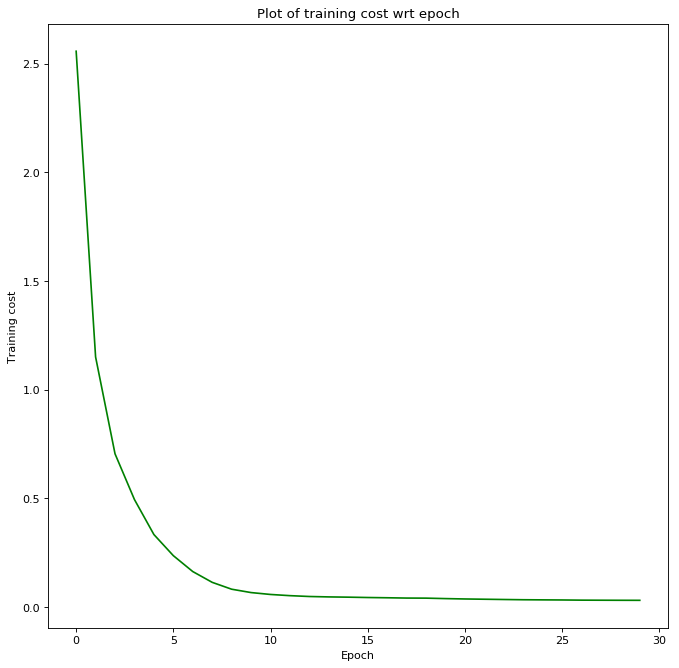

Test Accuracy = 91.71000123023987 %
Total training time for 30 epcohs =  222.0068645477295


In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
repeat_process(16, optimizer)

Epoch 1: training loss = 5.9441938400268555, training time = 1.8785219192504883, training_accuracy = 0.625, val accuracy = 0.7807999849319458, test_accuracy = 0.775600016117096
Epoch 2: training loss = 3.441150188446045, training time = 1.656576156616211, training_accuracy = 0.75, val accuracy = 0.8241999745368958, test_accuracy = 0.8179000020027161
Epoch 3: training loss = 2.7728092670440674, training time = 1.6188511848449707, training_accuracy = 0.796875, val accuracy = 0.8420000076293945, test_accuracy = 0.8363999724388123
Epoch 4: training loss = 2.3580281734466553, training time = 1.6283595561981201, training_accuracy = 0.8125, val accuracy = 0.8519999980926514, test_accuracy = 0.8454999923706055
Epoch 5: training loss = 2.067009925842285, training time = 1.6079211235046387, training_accuracy = 0.828125, val accuracy = 0.86080002784729, test_accuracy = 0.8532000184059143
Epoch 6: training loss = 1.8444788455963135, training time = 1.619619607925415, training_accuracy = 0.84375, v

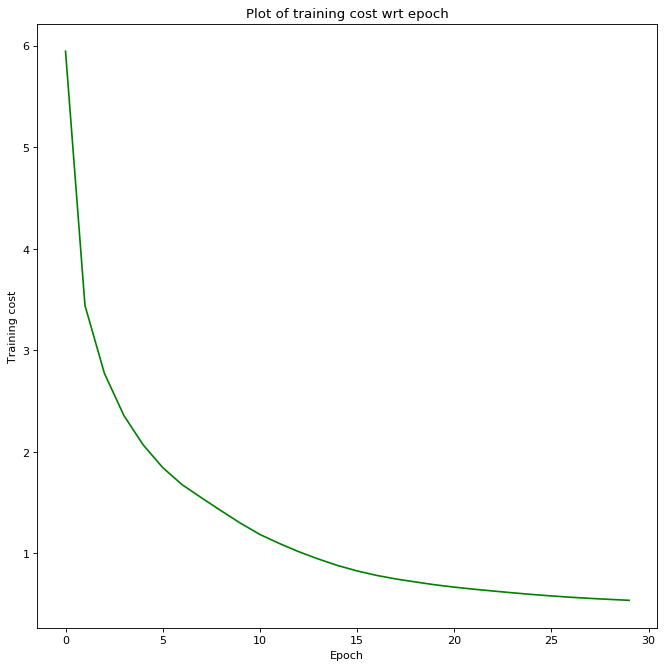

Test Accuracy = 88.85999917984009 %
Total training time for 30 epcohs =  50.1827027797699


In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
repeat_process(64, optimizer)

Epoch 1: training loss = 11.057971954345703, training time = 0.65297532081604, training_accuracy = 0.58203125, val accuracy = 0.5983999967575073, test_accuracy = 0.6032999753952026
Epoch 2: training loss = 6.2719879150390625, training time = 0.5778460502624512, training_accuracy = 0.67578125, val accuracy = 0.7039999961853027, test_accuracy = 0.7064999938011169
Epoch 3: training loss = 4.773257255554199, training time = 0.5015215873718262, training_accuracy = 0.74609375, val accuracy = 0.7509999871253967, test_accuracy = 0.7519000172615051
Epoch 4: training loss = 3.9669981002807617, training time = 0.49478626251220703, training_accuracy = 0.77734375, val accuracy = 0.7735999822616577, test_accuracy = 0.7749000191688538
Epoch 5: training loss = 3.4569554328918457, training time = 0.5053126811981201, training_accuracy = 0.8046875, val accuracy = 0.7906000018119812, test_accuracy = 0.7893000245094299
Epoch 6: training loss = 3.144953489303589, training time = 0.4979090690612793, training

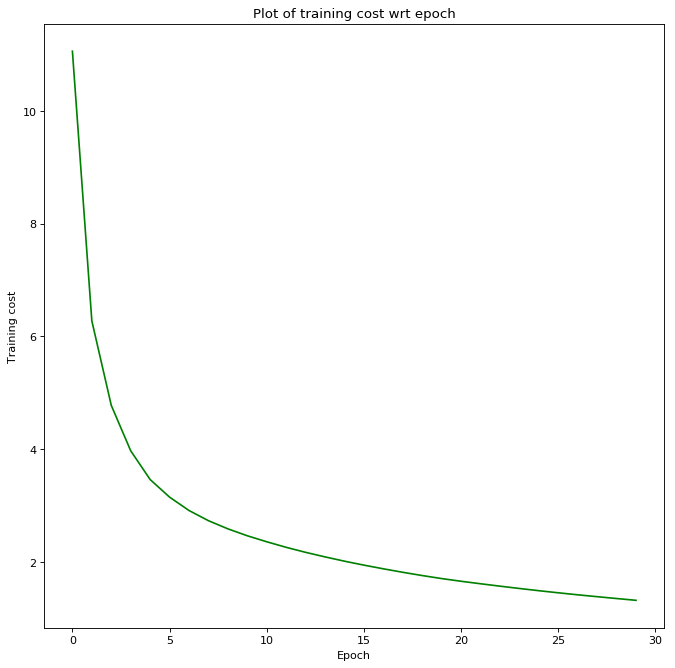

Test Accuracy = 86.9599997997284 %
Total training time for 30 epcohs =  15.200427293777466


In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
repeat_process(256, optimizer)

Epoch 1: training loss = 28.11763572692871, training time = 0.27896595001220703, training_accuracy = 0.3623046875, val accuracy = 0.32120001316070557, test_accuracy = 0.3181000053882599
Epoch 2: training loss = 16.712953567504883, training time = 0.19558024406433105, training_accuracy = 0.5146484375, val accuracy = 0.47540000081062317, test_accuracy = 0.4717000126838684
Epoch 3: training loss = 11.866029739379883, training time = 0.1948072910308838, training_accuracy = 0.6044921875, val accuracy = 0.5544000267982483, test_accuracy = 0.5557000041007996
Epoch 4: training loss = 9.215032577514648, training time = 0.20336008071899414, training_accuracy = 0.6640625, val accuracy = 0.605400025844574, test_accuracy = 0.6069999933242798
Epoch 5: training loss = 7.556918144226074, training time = 0.19435787200927734, training_accuracy = 0.7001953125, val accuracy = 0.6456000208854675, test_accuracy = 0.6424000263214111
Epoch 6: training loss = 6.423534870147705, training time = 0.19471168518066

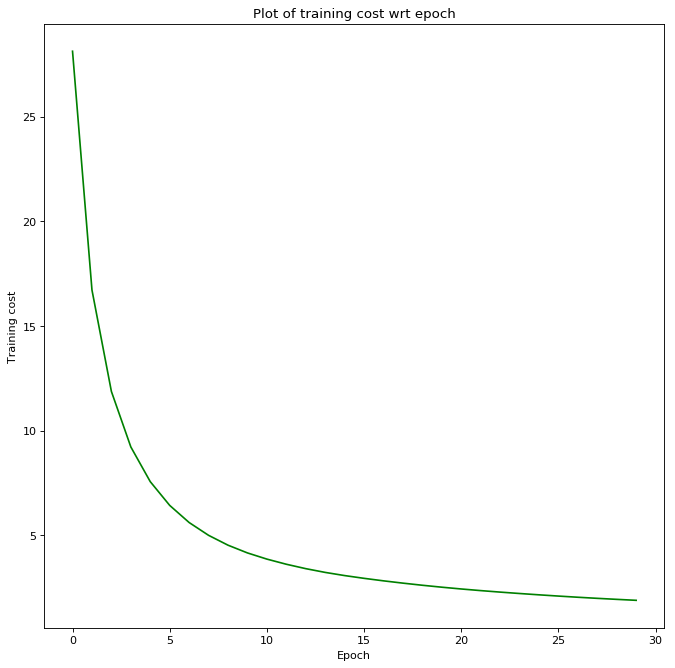

Test Accuracy = 82.52999782562256 %
Total training time for 30 epcohs =  6.031498670578003


In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
repeat_process(1024, optimizer)

Epoch 1: training loss = 0.05644531548023224, training time = 8.43069338798523, training_accuracy = 1.0, val accuracy = 0.9034000039100647, test_accuracy = 0.8991000056266785
Epoch 2: training loss = 0.0072446949779987335, training time = 8.632534503936768, training_accuracy = 1.0, val accuracy = 0.9265999794006348, test_accuracy = 0.9182999730110168
Epoch 3: training loss = 0.26821184158325195, training time = 8.417691707611084, training_accuracy = 0.9375, val accuracy = 0.9336000084877014, test_accuracy = 0.9284999966621399
Epoch 4: training loss = 0.05142685025930405, training time = 8.846543312072754, training_accuracy = 0.9375, val accuracy = 0.9300000071525574, test_accuracy = 0.9247000217437744
Epoch 5: training loss = 0.001021037227474153, training time = 8.355974674224854, training_accuracy = 1.0, val accuracy = 0.9409999847412109, test_accuracy = 0.9362000226974487
Epoch 6: training loss = 0.06423492729663849, training time = 8.51798129081726, training_accuracy = 0.9375, val 

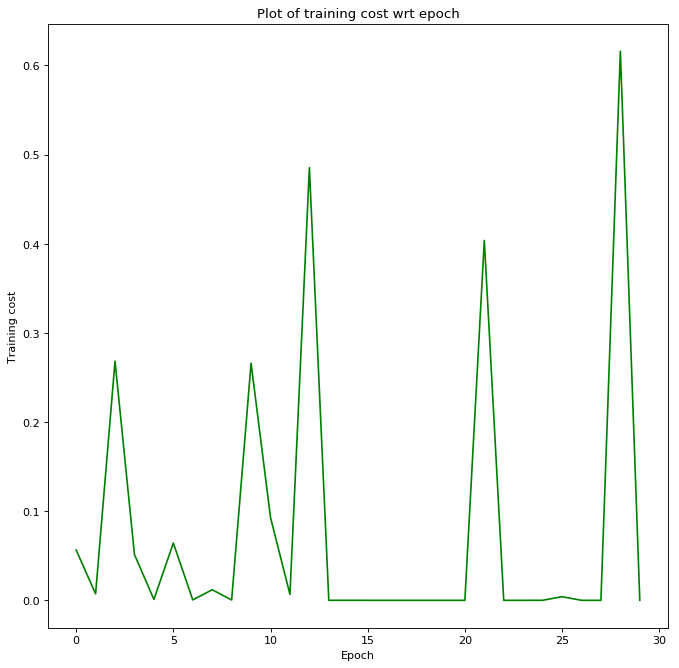

Test Accuracy = 95.46999931335449 %
Total training time for 30 epcohs =  254.53346610069275


In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.9, beta2=0.999, epsilon=1e-8)
repeat_process(16, optimizer)

Epoch 1: training loss = 0.6097646951675415, training time = 2.4478204250335693, training_accuracy = 0.921875, val accuracy = 0.9053999781608582, test_accuracy = 0.9014000296592712
Epoch 2: training loss = 0.30092984437942505, training time = 2.3500802516937256, training_accuracy = 0.90625, val accuracy = 0.9283999800682068, test_accuracy = 0.9192000031471252
Epoch 3: training loss = 0.3034476041793823, training time = 2.4523539543151855, training_accuracy = 0.9375, val accuracy = 0.9412000179290771, test_accuracy = 0.9330000281333923
Epoch 4: training loss = 0.36321282386779785, training time = 2.3310389518737793, training_accuracy = 0.984375, val accuracy = 0.946399986743927, test_accuracy = 0.9416000247001648
Epoch 5: training loss = 0.33864864706993103, training time = 2.1686580181121826, training_accuracy = 0.953125, val accuracy = 0.9531999826431274, test_accuracy = 0.9462000131607056
Epoch 6: training loss = 0.25772833824157715, training time = 2.1477608680725098, training_accur

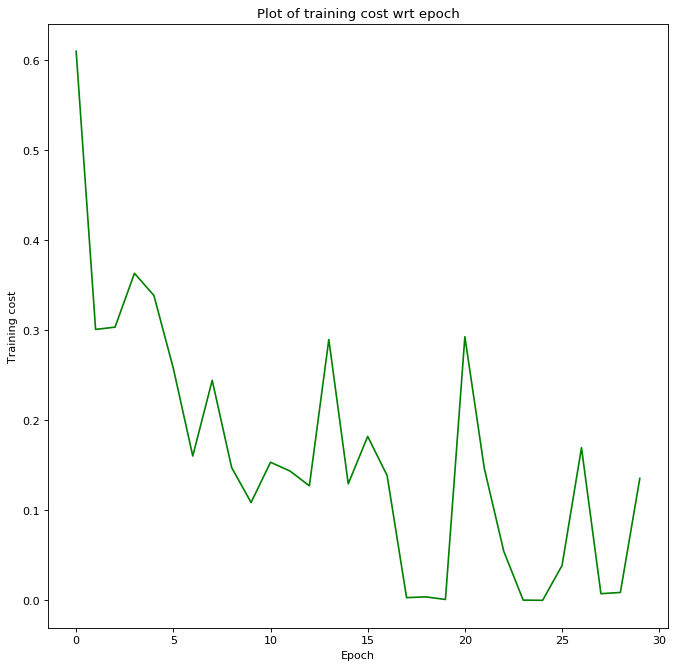

Test Accuracy = 96.43999934196472 %
Total training time for 30 epcohs =  68.04238724708557


In [20]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.9, beta2=0.999, epsilon=1e-8)
repeat_process(64, optimizer)

Epoch 1: training loss = 2.263699531555176, training time = 0.7053563594818115, training_accuracy = 0.91015625, val accuracy = 0.8841999769210815, test_accuracy = 0.8844000101089478
Epoch 2: training loss = 1.4904141426086426, training time = 0.6180517673492432, training_accuracy = 0.9296875, val accuracy = 0.9106000065803528, test_accuracy = 0.9110999703407288
Epoch 3: training loss = 0.9770620465278625, training time = 0.6449904441833496, training_accuracy = 0.94140625, val accuracy = 0.9197999835014343, test_accuracy = 0.9197999835014343
Epoch 4: training loss = 0.6671183109283447, training time = 0.6145851612091064, training_accuracy = 0.94140625, val accuracy = 0.928600013256073, test_accuracy = 0.9283000230789185
Epoch 5: training loss = 0.4815881550312042, training time = 0.6373364925384521, training_accuracy = 0.94921875, val accuracy = 0.9333999752998352, test_accuracy = 0.9325000047683716
Epoch 6: training loss = 0.3967953622341156, training time = 0.6219017505645752, trainin

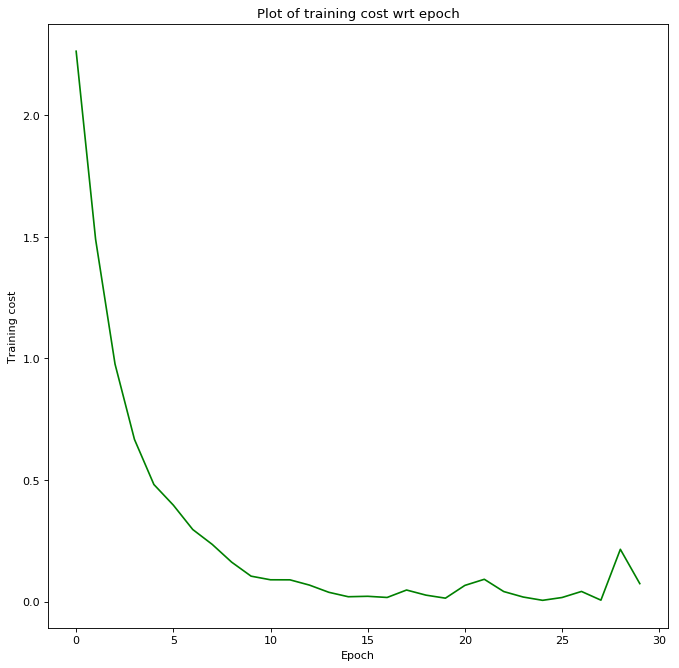

Test Accuracy = 95.56999802589417 %
Total training time for 30 epcohs =  19.415488481521606


In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.9, beta2=0.999, epsilon=1e-8)
repeat_process(256, optimizer)

Epoch 1: training loss = 2.432685613632202, training time = 0.38381314277648926, training_accuracy = 0.890625, val accuracy = 0.8385999798774719, test_accuracy = 0.8323000073432922
Epoch 2: training loss = 1.2079411745071411, training time = 0.2205944061279297, training_accuracy = 0.921875, val accuracy = 0.8799999952316284, test_accuracy = 0.8722000122070312
Epoch 3: training loss = 0.8334450125694275, training time = 0.2561757564544678, training_accuracy = 0.9326171875, val accuracy = 0.8938000202178955, test_accuracy = 0.8910999894142151
Epoch 4: training loss = 0.6224675178527832, training time = 0.2559826374053955, training_accuracy = 0.94140625, val accuracy = 0.9035999774932861, test_accuracy = 0.8986999988555908
Epoch 5: training loss = 0.48173338174819946, training time = 0.2395467758178711, training_accuracy = 0.9482421875, val accuracy = 0.9067999720573425, test_accuracy = 0.9053000211715698
Epoch 6: training loss = 0.3786497712135315, training time = 0.23243236541748047, tr

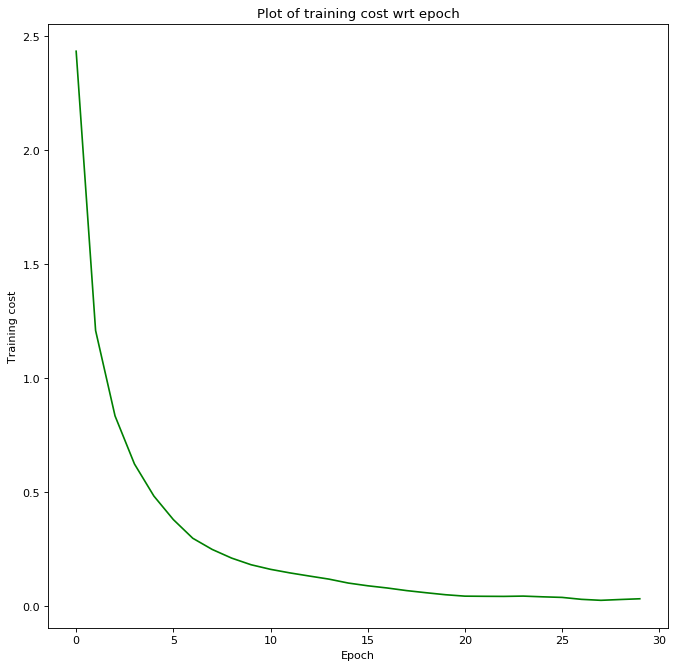

Test Accuracy = 94.19999718666077 %
Total training time for 30 epcohs =  7.478872060775757


In [22]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr, beta1=0.9, beta2=0.999, epsilon=1e-8)
repeat_process(1024, optimizer)

<h1> Discussions & comparisons </h1>

* The training cost becomes more smooth as the batch size increases.

* the training cost curve wrt iterations is more predictive in case of vanilla gradient descent

* training cost is more in case of numpy implementation

* The numpy implementation takes more time for training as compared to tensorflow libraries which are are highly optimized.

* As the batch size increases, the training time decreases in both cases - numpy & tf

* test accuracy is slightly better in case of numpy implementation, which could possibly be attributed to weight initialization and choice of learning rate.

* test accuracy better when using Adam optimizer